In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nolds
from nolitsa import lyapunov,dimension,delay,noise

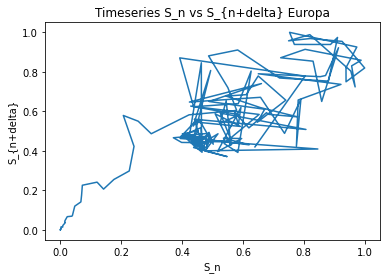

In [4]:
data2 = pd.read_excel (r'C:\Users\javie\Desktop\Modelamiento\Datos\de maass\CONTINENTES-2-CursoMM.xlsx')
df = pd.DataFrame(data2, columns= ['PacíficoOestenew','Américanew','Europanew'])
delta=4
#Europa
timeseries=np.array(df.Europanew)[:-3]
timeseriesd=np.array(df.Europanew)[delta:-3]
timeseries=np.delete(timeseries, 164, axis=0)
timeseriesd=np.delete(timeseriesd, 164-delta, axis=0)
X=timeseries/max(timeseries)
Y=timeseriesd/max(timeseriesd)
plt.figure()
plt.plot(X[:-delta],Y)
plt.title('Timeseries S_n vs S_{n+delta} Europa')
plt.ylabel('S_{n+delta}')
plt.xlabel('S_n')
plt.show()

In [5]:
#Funcion util para encontrar minimos locales.
def localmin(x):
    """Return all local minima from the given data set.
    Returns all local minima from the given data set.  Note that even
    "kinky" minima (which are probably not real minima) will be
    returned.
    Parameters
    ----------
    x : array
        1D scalar data set.
    Returns
    -------
    i : array
        Array containing location of all local minima.
    """
    return (np.diff(np.sign(np.diff(x))) > 0).nonzero()[0] + 1

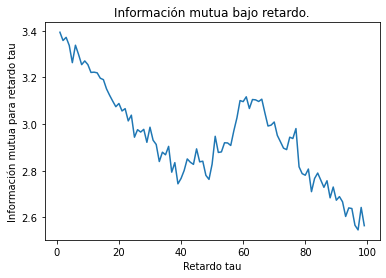

In [6]:
#Calculo de la información mutua entre X_t, X_(t+tau)
time_delay=np.zeros(99)
for tau in range(1,100):
    td=delay.mi(X[:-tau],X[tau:])
    time_delay[tau-1]=td
plt.plot(range(1,100),time_delay)
plt.title('Información mutua bajo retardo.')
plt.xlabel('Retardo tau')
plt.ylabel('Información mutua para retardo tau')
plt.show()

In [7]:
print('Los mínimos locales se alcanzan para tau='+ str(localmin(time_delay)+1))

Los mínimos locales se alcanzan para tau=[ 2  5  8 11 19 21 23 25 27 29 33 35 37 39 44 46 49 52 56 60 62 65 68 74
 76 80 82 86 88 90 93 97]


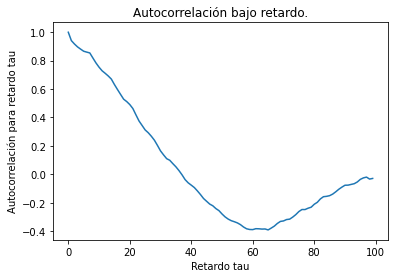

In [8]:
r = delay.acorr(X, maxtau=100)
plt.plot(range(0,100),r)
plt.title('Autocorrelación bajo retardo.')
plt.xlabel('Retardo tau')
plt.ylabel('Autocorrelación para retardo tau')
plt.show()

In [9]:
print('Los mínimos locales se alcanzan para tau='+str(localmin(r)))

Los mínimos locales se alcanzan para tau=[60 63 65 77 98]


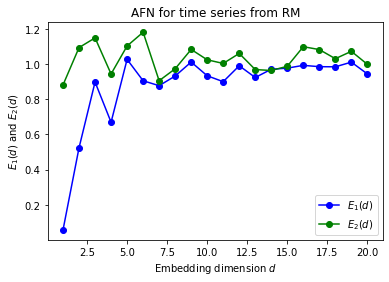

In [18]:
# AFN algorithm.
dim = np.arange(1, 20+ 2)
E, Es = dimension.afn(X, tau=2, dim=dim, window=10)
E1, E2 = E[1:] / E[:-1], Es[1:] / Es[:-1]

plt.title(r'AFN for time series from RM')
plt.xlabel(r'Embedding dimension $d$')
plt.ylabel(r'$E_1(d)$ and $E_2(d)$')
plt.plot(dim[:-1], E1, 'bo-', label=r'$E_1(d)$')
plt.plot(dim[:-1], E2, 'go-', label=r'$E_2(d)$')
plt.legend()

plt.show()

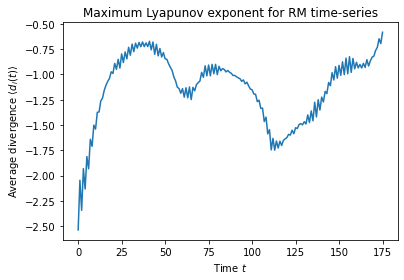

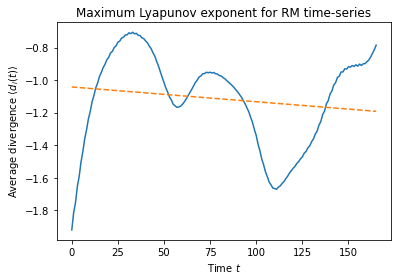

Linear fitting coeficient=-0.0009062584519584641


In [25]:
LEs=lyapunov.mle_embed(X, dim=[8], tau=2, window=10, maxt=300)[0]
plt.plot(range(len(LEs)),LEs)
plt.title('Maximum Lyapunov exponent for RM time-series')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.show()

sma=noise.sma(LEs, hwin=5)
plt.title('Maximum Lyapunov exponent for RM time-series')
plt.xlabel(r'Time $t$')
plt.ylabel(r'Average divergence $\langle d_i(t) \rangle$')
plt.plot(range(len(sma)),sma)
p = np.polyfit(range(len(sma)), sma,deg=1)
xaxis = range(len(sma))
yaxis = p[1] + p[0] * xaxis
plt.plot(xaxis, yaxis, '--')
plt.show()
print('Linear fitting coeficient='+str(p[0]))
MLE_nolitsa=p[0]

In [26]:
MLE_nolds=nolds.lyap_r(X, emb_dim=8, lag=2, min_tsep=10, tau=1, 
                 min_neighbors=20, trajectory_len=20, fit='RANSAC', 
                 debug_plot=False, debug_data=False, plot_file=None, fit_offset=0)

In [27]:
print("Valor obtenido de MLE con nolitsa: "+str(MLE_nolitsa))
print("Valor obtenido de MLE con nolds: "+str(MLE_nolds))

Valor obtenido de MLE con nolitsa: -0.0009062584519584641
Valor obtenido de MLE con nolds: 0.07915284364743337
